# Notebook exploration données : job_events

In [1]:
import os
import pandas as pd
from azure_blob import download_blob_file
from utilities import string_to_dict
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
filename = 'job_events.csv'
path = '../data/'

In [3]:
# téléchargement dans le repertoire 'data' d'un fichiers 'csv' depuis le blob
download_blob_file(file_name=filename, local_path=path)
job_events = os.path.join(path, filename)

job_events.csv already in path ../data/.


In [4]:
# création d'un dataframe à partir du csv de données
job_events_df = pd.read_csv(job_events, index_col=0).sort_values(by='received_at')
job_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48787 entries, 13269 to 400161
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payload      48787 non-null  object
 1   received_at  48787 non-null  object
 2   machine_id   48787 non-null  int64 
 3   tag          48787 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
job_events_df.head(5)

,payload,received_at,machine_id,tag
id,,,,
13269,"{""iper"": [{""id"": ""PRINT_ENGINE_1"", ""LED"": 10, ...",2021-06-18 09:22:32.478000,14,job-started
13270,"{""path"": ""D:/IMAGES/Standard/3040459-52x74-350...",2021-06-18 09:22:32.584000,14,job-preview-ready
13303,"{""iper"": [{""id"": ""PRINT_ENGINE_1"", ""LED"": 30, ...",2021-06-18 10:07:59.327000,14,job-started
13304,"{""path"": ""D:/IMAGES/Standard/3040459-52x74-350...",2021-06-18 10:07:59.442000,14,job-preview-ready
13308,"{""jobId"": ""1624010893"", ""jobState"": ""ERROR"", ""...",2021-06-18 10:10:07.879000,14,job-ended


In [6]:
# convertion des chaines de caractères de la colonne "payload" en dictionnaires
job_events_df["payload"] = job_events_df.payload.apply(string_to_dict)

In [7]:
# full_df = pd.DataFrame()
# # création d'un dataframe "payload" à partir des données de la colonne "payload"
# payload_df = job_events_df.payload.apply(pd.Series)
# payload_df.head(5)

In [8]:
# concaténation des colonnes issues de la colonne "payload" du df job_events avec les autres colonnes du df job_events
df = pd.concat([job_events_df.drop(['payload'], axis=1), job_events_df['payload'].apply(pd.Series)], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48787 entries, 13269 to 400161
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   received_at                48787 non-null  object 
 1   machine_id                 48787 non-null  int64  
 2   tag                        48787 non-null  object 
 3   iper                       16295 non-null  object 
 4   user                       16295 non-null  object 
 5   ifoil                      16295 non-null  object 
 6   jobId                      48787 non-null  object 
 7   layout                     16295 non-null  object 
 8   memjet                     16295 non-null  object 
 9   octopus                    16295 non-null  object 
 10  irDryers                   16295 non-null  object 
 11  uvDryers                   16295 non-null  object 
 12  machineId                  48787 non-null  object 
 13  timestamp                  32498 non-null

In [9]:
df.head(3)

,received_at,machine_id,tag,iper,user,ifoil,jobId,layout,memjet,octopus,...,uvDryers,machineId,timestamp,totalCopies,remoteScanner,remoteScannerRegistration,path,image,jobState,varnishConsumption
id,,,,,,,,,,,,,,,,,,,,,
13269,2021-06-18 09:22:32.478000,14,job-started,"[{'id': 'PRINT_ENGINE_1', 'LED': 10, 'bars': [...","{'level': 'Distributor', 'operator': 'Distribu...","[{'id': 'IFOIL_1', 'speed': 31.799999237060547...",1624008166,"{'speed': 418, 'pageLayout': 'LEFT', 'imageLay...",[],[],...,"[{'id': 'UV_DRYER_1', 'power': 70, 'enable': T...","{'type': 'JETvarnish 3D EVO', 'numMachine': 99...",2021-06-18T09:22:46.8661892Z,3.0,[],"[{'id': 'REGISTRATION_SCANNER_1', 'mode': 1, '...",NaN,NaN,NaN,NaN
13270,2021-06-18 09:22:32.584000,14,job-preview-ready,NaN,NaN,NaN,1624008166,NaN,NaN,NaN,...,NaN,"{'type': 'JETvarnish 3D EVO', 'numMachine': 99...",NaN,NaN,NaN,NaN,D:/IMAGES/Standard/3040459-52x74-350 CM-18-06-...,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...,NaN,NaN
13303,2021-06-18 10:07:59.327000,14,job-started,"[{'id': 'PRINT_ENGINE_1', 'LED': 30, 'bars': [...","{'level': 'Operator', 'operator': 'Micka'}","[{'id': 'IFOIL_1', 'speed': 26.200000762939453...",1624010893,"{'speed': 313, 'pageLayout': 'LEFT', 'imageLay...",[],[],...,"[{'id': 'UV_DRYER_1', 'power': 100, 'enable': ...","{'type': 'JETvarnish 3D EVO', 'numMachine': 99...",2021-06-18T10:08:13.7169739Z,100.0,[],"[{'id': 'REGISTRATION_SCANNER_1', 'mode': 1, '...",NaN,NaN,NaN,NaN


In [10]:
#df.groupby(by=['jobId'], sort=['received_at'])['tag'].unique()

In [11]:
series = df.loc[df['jobId'] == '1643030833']

In [12]:
series = series.sort_values(by=['received_at'])

In [14]:
series.to_csv('../data/jobs/job_1643030833.csv')

In [ ]:
series

,received_at,machine_id,tag,iper,user,ifoil,jobId,layout,memjet,octopus,...,uvDryers,machineId,timestamp,totalCopies,remoteScanner,remoteScannerRegistration,path,image,jobState,varnishConsumption
id,,,,,,,,,,,,,,,,,,,,,
68812,2022-01-24 13:26:31.790000,14,job-started,"[{'id': 'PRINT_ENGINE_1', 'LED': 10, 'bars': [...","{'level': 'Operator', 'operator': 'Viktor'}","[{'id': 'IFOIL_1', 'speed': 42, 'enabled': Fal...",1643030833,"{'speed': 700, 'pageLayout': 'LEFT', 'imageLay...",[],[],...,"[{'id': 'UV_DRYER_1', 'power': 100, 'enable': ...","{'type': 'JETvarnish 3D EVO', 'numMachine': 99...",2022-01-24T13:27:13.9515363Z,2.0,[],"[{'id': 'REGISTRATION_SCANNER_1', 'mode': 1, '...",NaN,NaN,NaN,NaN
68813,2022-01-24 13:26:31.893000,14,job-preview-ready,NaN,NaN,NaN,1643030833,NaN,NaN,NaN,...,NaN,"{'type': 'JETvarnish 3D EVO', 'numMachine': 99...",NaN,NaN,NaN,NaN,D:/IMAGES/Standard/3266733-evo-#1/0000002 V01.tif,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...,NaN,NaN
68814,2022-01-24 13:29:17.415000,14,job-ended,NaN,NaN,NaN,1643030833,NaN,NaN,NaN,...,NaN,"{'type': 'JETvarnish 3D EVO', 'numMachine': 99...",2022-01-24T13:29:59.5481296Z,2.0,NaN,NaN,NaN,NaN,SUCCESS,"[{'iperId': 'PRINT_ENGINE_1', 'operatorSideTan..."


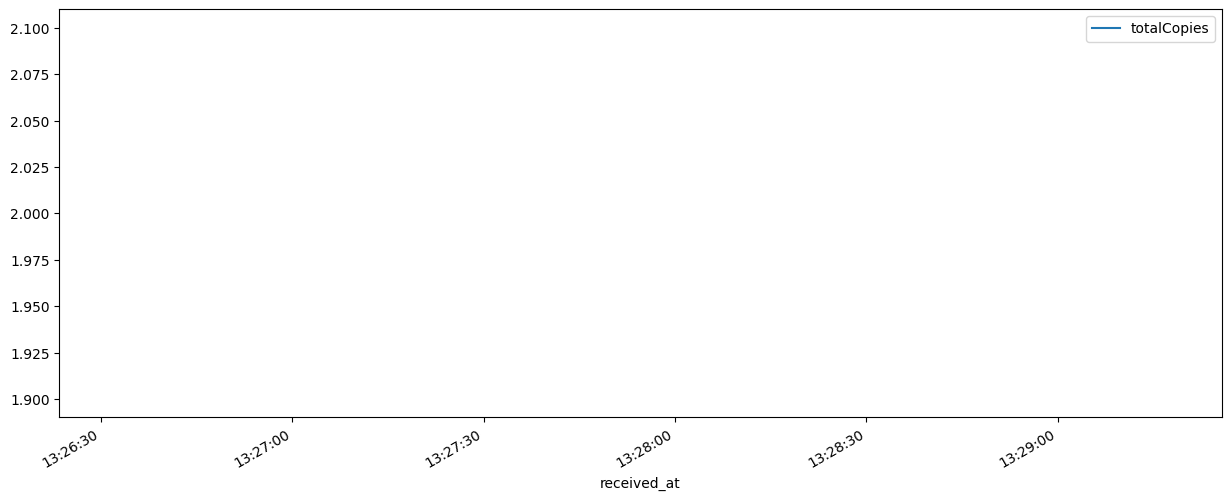

In [ ]:
data = pd.read_csv('job_1670833714.csv')
df = pd.DataFrame(data, columns = ['received_at', 'totalCopies'])

# Set the Date as Index
df['received_at'] = pd.to_datetime(df['received_at'])
df.index = df['received_at']
del df['received_at']

df.plot(figsize=(15, 6))
plt.show()